In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:03<00:00, 248MB/s]
100% 812M/812M [00:03<00:00, 269MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.1158.jpg', 'cat.5676.jpg', 'cat.3950.jpg', 'dog.5338.jpg', 'dog.750.jpg', 'cat.3327.jpg', 'cat.6879.jpg', 'dog.8313.jpg', 'cat.9706.jpg', 'dog.4802.jpg', 'cat.11003.jpg', 'cat.1222.jpg', 'dog.6063.jpg', 'dog.2475.jpg', 'dog.8240.jpg', 'cat.8704.jpg', 'cat.11780.jpg', 'dog.11866.jpg', 'cat.6018.jpg', 'dog.6948.jpg', 'dog.8192.jpg', 'cat.6648.jpg', 'dog.1460.jpg', 'cat.4490.jpg', 'cat.1919.jpg', 'cat.3840.jpg', 'dog.4667.jpg', 'dog.7628.jpg', 'cat.1668.jpg', 'cat.3477.jpg', 'cat.5250.jpg', 'dog.10423.jpg', 'cat.3182.jpg', 'cat.7772.jpg', 'dog.7338.jpg', 'dog.3506.jpg', 'dog.5892.jpg', 'cat.11031.jpg', 'cat.12071.jpg', 'dog.6662.jpg', 'dog.9240.jpg', 'dog.7811.jpg', 'cat.4424.jpg', 'dog.5883.jpg', 'dog.5953.jpg', 'dog.3429.jpg', 'cat.2955.jpg', 'cat.2181.jpg', 'dog.5642.jpg', 'cat.9142.jpg', 'cat.6445.jpg', 'dog.11053.jpg', 'cat.681.jpg', 'dog.7912.jpg', 'dog.6501.jpg', 'dog.4774.jpg', 'dog.3855.jpg', 'dog.7436.jpg', 'cat.11969.jpg', 'cat.11270.jpg', 'cat.7078.jpg', 'dog.1133.jpg', 

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

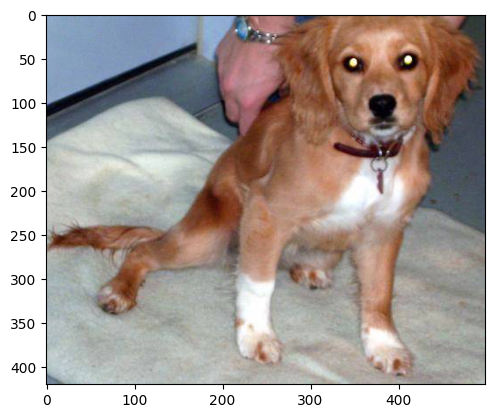

In [15]:
img = mpimg.imread('/content/train/dog.5338.jpg')
imgplt = plt.imshow(img)
plt.show()

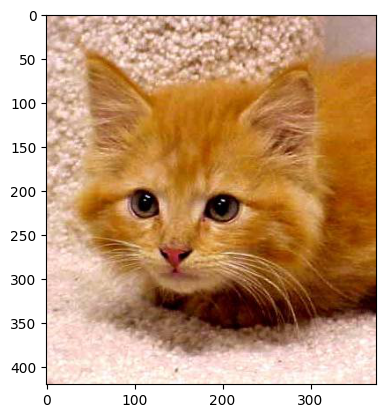

In [16]:
img = mpimg.imread('/content/train/cat.5676.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
dog


In [18]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [19]:
os.mkdir('/content/image resized')

In [20]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i] #taking the name of image
  img_path = original_folder+filename       #concatenating the path wid img for the url

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

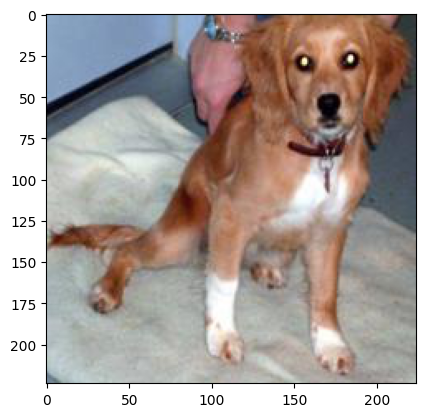

In [21]:
img = mpimg.imread('/content/image resized/dog.5338.jpg')
imgplt = plt.imshow(img)
plt.show()

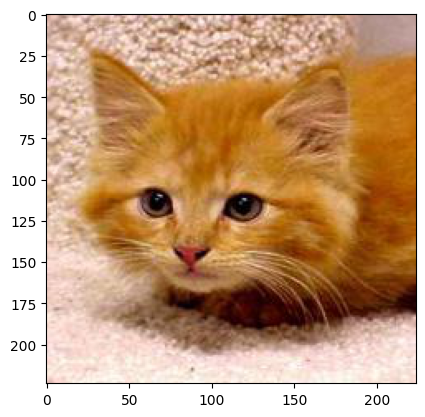

In [22]:
img = mpimg.imread('/content/image resized/cat.5676.jpg')
imgplt = plt.imshow(img)
plt.show()

In [23]:
#Cat is labelled ad 0 and Dog is labelled as 1
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.1158.jpg', 'cat.5676.jpg', 'cat.3950.jpg', 'dog.5338.jpg', 'dog.750.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [26]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 989 1011]


In [27]:
import cv2
import glob

In [28]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [29]:
 print(dog_cat_images)

[[[[ 86 110 146]
   [ 84 109 143]
   [ 84 109 143]
   ...
   [ 31  47  54]
   [ 31  47  54]
   [ 30  46  53]]

  [[ 83 107 143]
   [ 83 108 142]
   [ 83 108 140]
   ...
   [ 31  47  54]
   [ 31  47  54]
   [ 30  46  53]]

  [[ 81 106 140]
   [ 81 106 140]
   [ 84 109 141]
   ...
   [ 31  47  54]
   [ 31  47  54]
   [ 30  46  53]]

  ...

  [[ 48  41 126]
   [ 45  42 122]
   [ 52  56 127]
   ...
   [186 219 228]
   [184 217 226]
   [173 206 215]]

  [[ 44  43 115]
   [ 87  90 158]
   [131 142 200]
   ...
   [188 220 226]
   [182 214 220]
   [174 206 212]]

  [[133 135 200]
   [142 147 208]
   [147 160 212]
   ...
   [180 212 218]
   [180 212 218]
   [180 212 218]]]


 [[[164 176 218]
   [152 164 206]
   [162 174 214]
   ...
   [153 158 189]
   [153 158 189]
   [154 159 190]]

  [[168 180 222]
   [157 169 211]
   [167 179 219]
   ...
   [153 158 189]
   [153 158 189]
   [153 158 189]]

  [[166 178 218]
   [159 171 211]
   [169 181 221]
   ...
   [152 157 188]
   [152 157 188]
   [151 156

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [32]:
X = dog_cat_images
Y = np.asarray(labels)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [35]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
print(X_train_scaled)

[[[[0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   ...
   [0.27843137 0.36470588 0.29019608]
   [0.25882353 0.34901961 0.2627451 ]
   [0.24313725 0.3372549  0.24313725]]

  [[0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   ...
   [0.30980392 0.39607843 0.32156863]
   [0.29019608 0.38039216 0.29411765]
   [0.27843137 0.37254902 0.27843137]]

  [[0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   [0.01568627 0.02352941 0.02352941]
   ...
   [0.3372549  0.42745098 0.34117647]
   [0.31764706 0.41176471 0.31764706]
   [0.30588235 0.40392157 0.30196078]]

  ...

  [[0.02745098 0.02745098 0.02745098]
   [0.02745098 0.02745098 0.02745098]
   [0.02745098 0.02745098 0.02745098]
   ...
   [0.6627451  0.68235294 0.68627451]
   [0.65490196 0.6745098  0.67843137]
   [0.63529412 0.65490196 0.65882353]]

  [[0.02745098 0.02745098 0.02745098]
   [0.0

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [39]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [41]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 40s 714ms/step - loss: 0.1628 - acc: 0.9294
Epoch 2/5
50/50 [==============================] - 39s 778ms/step - loss: 0.0522 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 39s 771ms/step - loss: 0.0335 - acc: 0.9919
Epoch 4/5
50/50 [==============================] - 36s 731ms/step - loss: 0.0259 - acc: 0.9944
Epoch 5/5
50/50 [==============================] - 37s 743ms/step - loss: 0.0191 - acc: 0.9975


In [42]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 765ms/step - loss: 0.0564 - acc: 0.9775
Test Loss = 0.0563516840338707
Test Accuracy = 0.9775000214576721


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Output hidden; open in https://colab.research.google.com to view.

In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Output hidden; open in https://colab.research.google.com to view.